In [1]:
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-hea

In [2]:
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [4]:
!pip install pyspark==3.0.0

     |████████████████████████████████| 204.7 MB 22 kB/s 
     |████████████████████████████████| 198 kB 39.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=e9118048181d66d8068cce9092483250256a8c2f89657a6c2348a69e2633afc6
  Stored in directory: /root/.cache/pip/wheels/4e/c5/36/aef1bb711963a619063119cc032176106827a129c0be20e301
Successfully built pyspark


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("lesson-4").getOrCreate()

In [7]:
df = spark.read.csv('bank.csv',inferSchema=True,header=True)

In [8]:
df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|unknown|  5| 

Удалим ненужные столбцы

In [9]:
df = df.drop(*['contact', 'day', 'month','default'])
df.columns

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [10]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

In [11]:
cols = df.columns
cols

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

Список столбцов, которые имеют строковый тип

In [22]:
categoricalColumns = [item[0] for item in df.dtypes if item[1].startswith('string') ]
categoricalColumns

['job', 'marital', 'education', 'housing', 'loan', 'poutcome', 'deposit']

Список столбцов, которые имеют числовой тип

In [23]:
numericColumns = [item[0] for item in df.dtypes if item[1].startswith('int') ]
numericColumns

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

Основная статистика для числовых столбцов

In [24]:
df.select(numericColumns).describe().toPandas()

,summary,age,balance,duration,campaign,pdays,previous
0,count,11162,11162,11162,11162,11162,11162
1,mean,41.231947679627304,1528.5385235620856,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358
2,stddev,11.913369192215518,3225.413325946149,347.12838571630687,2.7220771816614824,108.75828197197717,2.292007218670508
3,min,18,-6847,2,1,-1,0
4,max,95,81204,3881,63,854,58


Смотрим кореляцию между числовыми столбцами

In [25]:
numeric_data = df.select(numericColumns).toPandas()
numeric_data.corr()

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.112300,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.022436,-0.013894,0.017411,0.030805
duration,0.000189,0.022436,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.026716,-0.049699,0.507272,1.000000


### Строим pipelines

In [26]:
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StringIndexer

#### Обрабатываем категориальные столбцы

In [29]:
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericColumns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

#### Создаем pipelines и делаем преобразования

In [30]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [31]:
df.show(5)

+-----+--------------------+---+----------+-------+---------+-------+-------+----+--------+--------+-----+--------+--------+-------+
|label|            features|age|       job|marital|education|balance|housing|loan|duration|campaign|pdays|previous|poutcome|deposit|
+-----+--------------------+---+----------+-------+---------+-------+-------+----+--------+--------+-----+--------+--------+-------+
|  1.0|(28,[3,11,13,17,1...| 59|    admin.|married|secondary|   2343|    yes|  no|    1042|       1|   -1|       0| unknown|    yes|
|  1.0|(28,[3,11,13,16,1...| 56|    admin.|married|secondary|     45|     no|  no|    1467|       1|   -1|       0| unknown|    yes|
|  1.0|(28,[2,11,13,17,1...| 41|technician|married|secondary|   1270|    yes|  no|    1389|       1|   -1|       0| unknown|    yes|
|  1.0|(28,[4,11,13,17,1...| 55|  services|married|secondary|   2476|    yes|  no|     579|       1|   -1|       0| unknown|    yes|
|  1.0|(28,[3,11,14,16,1...| 54|    admin.|married| tertiary|    184|

In [32]:
df.toPandas().head(2)

,label,features,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,1.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,admin.,married,secondary,2343,yes,no,1042,1,-1,0,unknown,yes
1,1.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",56,admin.,married,secondary,45,no,no,1467,1,-1,0,unknown,yes


Разделим на test, train

In [34]:
train_df, test_df = df.randomSplit([0.7, 0.3], seed = 2022)
print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))

Training Dataset Count: 7796
Test Dataset Count: 3366


Классифицируем

In [35]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train_df)

In [36]:
lr_summary=lrModel.summary

Общая точность модели

In [37]:
lr_summary.accuracy

1.0

Площадь под контролем

In [38]:
lr_summary.areaUnderROC

0.9999512104393309

Точность обоих классов

In [39]:
print(lr_summary.precisionByLabel)

[1.0, 1.0]


In [40]:
print(lr_summary.recallByLabel)

[1.0, 1.0]


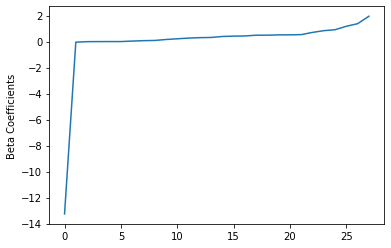

In [41]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

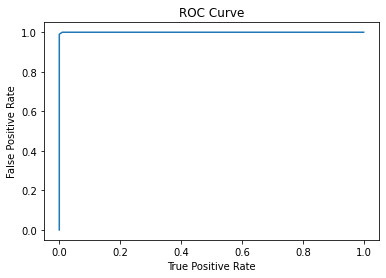

Training set areaUnderROC: 0.9999512104393309


In [42]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

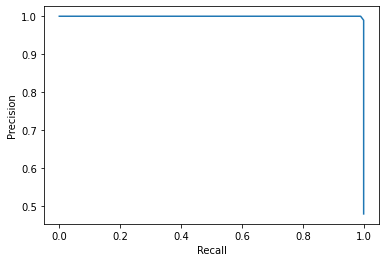

In [43]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

Берем 4 столбца для предсказаний метод прогноза и преобразований

In [44]:
predictions = lrModel.transform(test_df)
predictions.select('label','rawPrediction','probability','prediction').toPandas().head(20)

,label,rawPrediction,probability,prediction
0,0.0,"[7.860075513759836, -7.860075513759836]","[0.9996143040850523, 0.0003856959149477766]",0.0
1,0.0,"[7.149565920126307, -7.149565920126307]","[0.9992154112139521, 0.0007845887860478037]",0.0
2,0.0,"[6.488597006541707, -6.488597006541707]","[0.9984816279419262, 0.0015183720580738943]",0.0
3,0.0,"[7.689350939977981, -7.689350939977981]","[0.9995425342367206, 0.00045746576327951446]",0.0
4,0.0,"[7.0683348119319565, -7.0683348119319565]","[0.9991490746040524, 0.0008509253959475451]",0.0
5,0.0,"[7.3427593247138425, -7.3427593247138425]","[0.9993531566287414, 0.0006468433712586559]",0.0
6,0.0,"[6.779662432112886, -6.779662432112886]","[0.9988646319927493, 0.0011353680072505826]",0.0
7,0.0,"[7.122130844458549, -7.122130844458549]","[0.9991936055670076, 0.0008063944329922548]",0.0
8,0.0,"[6.89525288528883, -6.89525288528883]","[0.998988443407514, 0.0010115565924859165]",0.0
9,0.0,"[6.614193436525999, -6.614193436525999]","[0.9986606002780021, 0.0013393997219978582]",0.0


Оценка модели логистической регрессии

In [45]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9999996449317559
